<a href="https://colab.research.google.com/github/sonalik23/ML-models/blob/master/knn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# New Section

In [0]:
from google.colab import files
uploaded= files.upload()

Saving KNN_Project_Data to KNN_Project_Data


In [0]:
df=pd.read_csv(io.BytesIO(uploaded['KNN_Project_Data']))

In [0]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler=StandardScaler()

In [0]:
df.columns

Index(['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC', 'TARGET CLASS'],
      dtype='object')

In [0]:
s=df[['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC']]

In [0]:
scaler.fit(s)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
scaled_features=scaler.transform(s)

In [0]:
df_scaled=pd.DataFrame(scaled_features)

In [0]:
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [0]:
from sklearn.model_selection import train_test_split


In [0]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'], test_size=0.3, random_state=101)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()



In [0]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
pred=model.predict(X_test)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
evaluation1=classification_report(y_test,pred)
evaluation2=confusion_matrix(y_test,pred)

In [0]:
print(evaluation1)
print(evaluation2)

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       152
           1       0.79      0.78      0.79       148

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300

[[122  30]
 [ 32 116]]


In [0]:
error_rate=[]
for i in range(1,40):
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train,y_train)
  pred_i=model.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

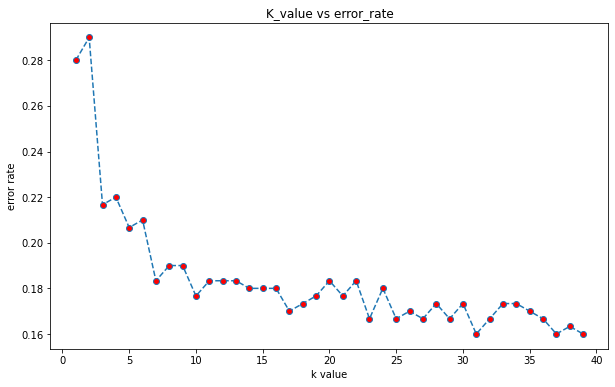

In [0]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,linestyle='dashed',marker='o',markerfacecolor='red')
plt.title('K_value vs error_rate')
plt.xlabel('k value')
plt.ylabel('error rate')
plt.show()